In [138]:
import yfinance as yf
import pandas as pd
import numpy as np 

import torch
import torch.nn as nn
ticker ='MMM'


In [139]:
stock=yf.Ticker(ticker)
print(stock)
df=stock.history(period="max")
df.tail() 

yfinance.Ticker object <MMM>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-18 00:00:00-04:00,152.360001,155.429993,152.190002,152.860001,2585500,0.0,0.0
2025-08-19 00:00:00-04:00,152.839996,155.720001,152.050003,154.339996,2146200,0.0,0.0
2025-08-20 00:00:00-04:00,154.119995,155.339996,153.169998,154.750000,3258200,0.0,0.0
2025-08-21 00:00:00-04:00,154.369995,155.210007,153.149994,154.380005,2236900,0.0,0.0
2025-08-22 00:00:00-04:00,155.750000,159.110001,155.000000,158.720001,1958200,0.0,0.0


In [140]:
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.558185,0.575100,0.558185,0.562414,254509,0.0,0.0
1962-01-03 00:00:00-05:00,0.562414,0.566643,0.552899,0.566643,505190,0.0,0.0
1962-01-04 00:00:00-05:00,0.566643,0.576157,0.566643,0.566643,254509,0.0,0.0
1962-01-05 00:00:00-05:00,0.564528,0.564528,0.549728,0.551842,376979,0.0,0.0
1962-01-08 00:00:00-05:00,0.551842,0.552899,0.545499,0.548671,399942,0.0,0.0


In [141]:
import datetime as dt
df= df.reset_index()
df['Date'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d'))

In [142]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.558185,0.575100,0.558185,0.562414,254509,0.0,0.0
1,1962-01-03,0.562414,0.566643,0.552899,0.566643,505190,0.0,0.0
2,1962-01-04,0.566643,0.576157,0.566643,0.566643,254509,0.0,0.0
3,1962-01-05,0.564528,0.564528,0.549728,0.551842,376979,0.0,0.0
4,1962-01-08,0.551842,0.552899,0.545499,0.548671,399942,0.0,0.0


In [143]:
df =df[['Date','Close']]
df

,Date,Close
0,1962-01-02,0.562414
1,1962-01-03,0.566643
2,1962-01-04,0.566643
3,1962-01-05,0.551842
4,1962-01-08,0.548671
...,...,...
16013,2025-08-18,152.860001
16014,2025-08-19,154.339996
16015,2025-08-20,154.750000
16016,2025-08-21,154.380005


In [144]:
device ='cude:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

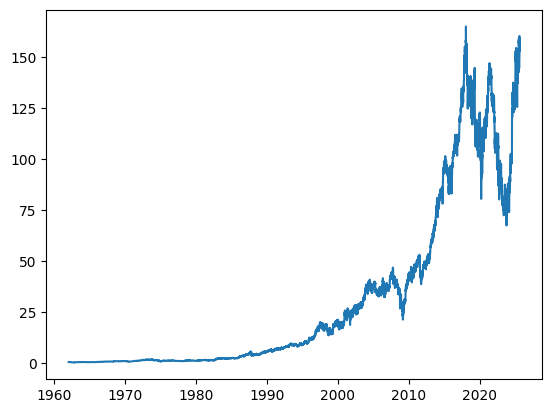

In [145]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['Close'])

In [146]:
from copy import deepcopy as dc

def perare_df_for_lstm(df,n_step):
    df = dc(df)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    
    for i in range(1,n_step+1):
        df[f'Close(t-{i})'] = df['Close'].shift(1)
        
    df.dropna(inplace=True)
    
    return df 

lookback = 7
shifted_df = perare_df_for_lstm(df,lookback)
shifted_df


,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1962-01-03,0.566643,0.562414,0.562414,0.562414,0.562414,0.562414,0.562414,0.562414
1962-01-04,0.566643,0.566643,0.566643,0.566643,0.566643,0.566643,0.566643,0.566643
1962-01-05,0.551842,0.566643,0.566643,0.566643,0.566643,0.566643,0.566643,0.566643
1962-01-08,0.548671,0.551842,0.551842,0.551842,0.551842,0.551842,0.551842,0.551842
1962-01-09,0.548671,0.548671,0.548671,0.548671,0.548671,0.548671,0.548671,0.548671
...,...,...,...,...,...,...,...,...
2025-08-18,152.860001,152.389999,152.389999,152.389999,152.389999,152.389999,152.389999,152.389999
2025-08-19,154.339996,152.860001,152.860001,152.860001,152.860001,152.860001,152.860001,152.860001
2025-08-20,154.750000,154.339996,154.339996,154.339996,154.339996,154.339996,154.339996,154.339996


In [147]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[  0.56664252,   0.56241405,   0.56241405, ...,   0.56241405,
          0.56241405,   0.56241405],
       [  0.56664252,   0.56664252,   0.56664252, ...,   0.56664252,
          0.56664252,   0.56664252],
       [  0.55184221,   0.56664252,   0.56664252, ...,   0.56664252,
          0.56664252,   0.56664252],
       ...,
       [154.75      , 154.33999634, 154.33999634, ..., 154.33999634,
        154.33999634, 154.33999634],
       [154.38000488, 154.75      , 154.75      , ..., 154.75      ,
        154.75      , 154.75      ],
       [158.72000122, 154.38000488, 154.38000488, ..., 154.38000488,
        154.38000488, 154.38000488]])

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np=scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99746848, -0.99751988, -0.99751988, ..., -0.99751988,
        -0.99751988, -0.99751988],
       [-0.99746848, -0.99746848, -0.99746848, ..., -0.99746848,
        -0.99746848, -0.99746848],
       [-0.9976484 , -0.99746848, -0.99746848, ..., -0.99746848,
        -0.99746848, -0.99746848],
       ...,
       [ 0.87692238,  0.87193801,  0.87193801, ...,  0.87193801,
         0.87193801,  0.87193801],
       [ 0.87242439,  0.87692238,  0.87692238, ...,  0.87692238,
         0.87692238,  0.87692238],
       [ 0.92518527,  0.87242439,  0.87242439, ...,  0.87242439,
         0.87242439,  0.87242439]])

In [149]:
X = shifted_df_as_np[:,1:]
y = shifted_df_as_np[:,0] 

X.shape ,y.shape

((16017, 7), (16017,))

In [150]:
X = dc(np.flip(X,axis=1))
X

array([[-0.99751988, -0.99751988, -0.99751988, ..., -0.99751988,
        -0.99751988, -0.99751988],
       [-0.99746848, -0.99746848, -0.99746848, ..., -0.99746848,
        -0.99746848, -0.99746848],
       [-0.99746848, -0.99746848, -0.99746848, ..., -0.99746848,
        -0.99746848, -0.99746848],
       ...,
       [ 0.87193801,  0.87193801,  0.87193801, ...,  0.87193801,
         0.87193801,  0.87193801],
       [ 0.87692238,  0.87692238,  0.87692238, ...,  0.87692238,
         0.87692238,  0.87692238],
       [ 0.87242439,  0.87242439,  0.87242439, ...,  0.87242439,
         0.87242439,  0.87242439]])

In [151]:
split_index = int(len(X)*0.95)

split_index

15216

In [152]:
X_train = X[:split_index]
X_test=X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape,X_test.shape,y_test.shape,y_train.shape

((15216, 7), (801, 7), (801,), (15216,))

In [153]:
X_train =X_train.reshape((-1,lookback,1))
X_test=X_test.reshape((-1,lookback,1))

y_test=y_test.reshape((-1,1))
y_train = y_train.reshape((-1,1))

X_test.shape,X_train.shape,y_test.shape,y_train.shape

((801, 7, 1), (15216, 7, 1), (801, 1), (15216, 1))

In [154]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_test.shape,X_train.shape,y_test.shape,y_train.shape


(torch.Size([801, 7, 1]),
 torch.Size([15216, 7, 1]),
 torch.Size([801, 1]),
 torch.Size([15216, 1]))

In [155]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y =y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,i):
        return self.X[i],self.y[i]


train_ds = TimeSeriesDataset(X_train,y_train)
test_ds = TimeSeriesDataset(X_test,y_test)    
        

In [156]:
train_ds

In [157]:
test_ds

In [158]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,shuffle =False)

In [159]:
for _, batch in enumerate(train_loader):
    x_batch,y_batch = batch[0].to(device),batch[1].to(device)
    print(x_batch.shape,y_batch.shape)
    break
    

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [160]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [161]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [162]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [163]:
learning_rate = 0.01
num_epochs = 27
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.075
Batch 200, Loss: 0.003
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000
Batch 700, Loss: 0.000
Batch 800, Loss: 0.000
Batch 900, Loss: 0.000

Val Loss: 0.001
***************************************************

Epoch: 2
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000
Batch 700, Loss: 0.000
Batch 800, Loss: 0.000
Batch 900, Loss: 0.000

Val Loss: 0.001
***************************************************

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000
Batch 700, Loss: 0.000
Batch 800, Loss: 0.000
Batch 900, Loss: 0.000

Val Loss: 0.001
***************************************************

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0

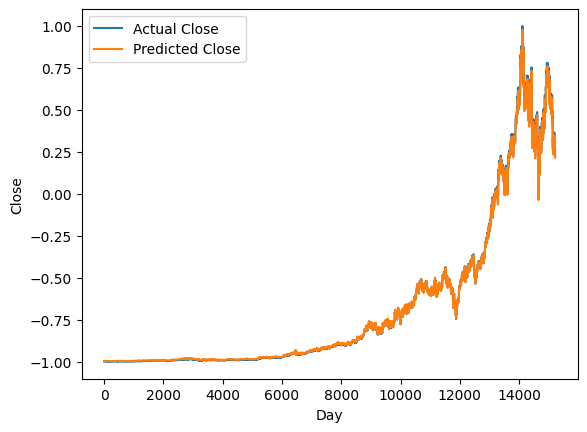

In [164]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [165]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.86025129,   0.86450705,   0.86450705, ..., 106.12036353,
       105.22106448, 100.48303401])

In [166]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  0.56664305,   0.56664305,   0.55184104, ..., 106.44717455,
       101.62612855, 100.68109847])

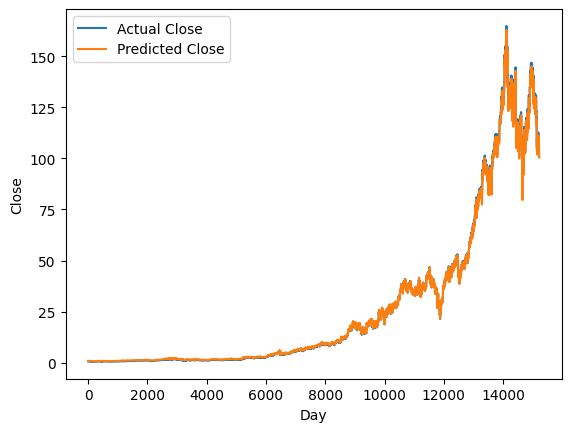

In [167]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [168]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 99.55372033,  98.74043005,  98.07225115,  95.60922982,
        94.80973154,  94.93327975,  95.21675359,  95.03504537,
        98.07225115,  96.96079166,  95.16588059,  94.7588377 ,
        94.49716114,  93.82832402,  94.35176539,  94.80973154,
        94.96234933,  93.99553789,  94.20635615,  95.07140074,
        93.74106622,  93.69744468,  95.02049832,  94.13367115,
        96.47398146,  97.11336656,  97.79622366,  97.91972284,
        97.91972284, 102.73287631, 101.36133372, 102.45714054,
       104.5392799 , 104.62631707, 103.45839521, 104.72060814,
       108.07819718, 107.5633801 , 108.33920571, 107.87516603,
       108.99176381, 109.19477535, 111.0654468 , 110.47814451,
       109.62982634, 107.57788057, 107.03404538, 107.04136549,
       104.39641775, 104.51366199, 103.99336096, 105.25375   ,
        95.26420066,  93.28125411,  92.12048933,  91.7457434 ,
        92.68621312,  89.76145098,  86.04865243,  88.95286386,
        88.01186277,  90.82716717,  91.67225982,  88.89

In [169]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 99.85421722,  99.17498829,  96.67217217,  95.8600537 ,
        95.98554225,  96.27348268,  96.08891236,  99.17498829,
        98.04539524,  96.22180927,  95.80836435,  95.5425877 ,
        94.86335755,  95.39492801,  95.8600537 ,  96.01507516,
        95.03315774,  95.24725362,  96.12583893,  94.77475022,
        94.73045329,  96.07413487,  95.17343848,  97.55073542,
        98.20044   ,  98.8944317 ,  99.01995089,  99.01995089,
       103.91483286, 102.51946316, 103.63427627, 105.75317427,
       105.84177302, 104.65311414, 105.93775072, 109.35605543,
       108.83186391, 109.62183453, 109.14932991, 110.28629944,
       110.49302006, 112.39782831, 111.79981307, 110.93601138,
       108.84663404, 108.2928998 , 108.30036209, 105.60777974,
       105.72711264, 105.19755484, 106.48044597,  96.32167868,
        94.30784599,  93.12938646,  92.74897762,  93.70369716,
        90.73512287,  86.96849055,  89.9146651 ,  88.95996088,
        91.81663515,  92.67438537,  89.85500355,  87.66

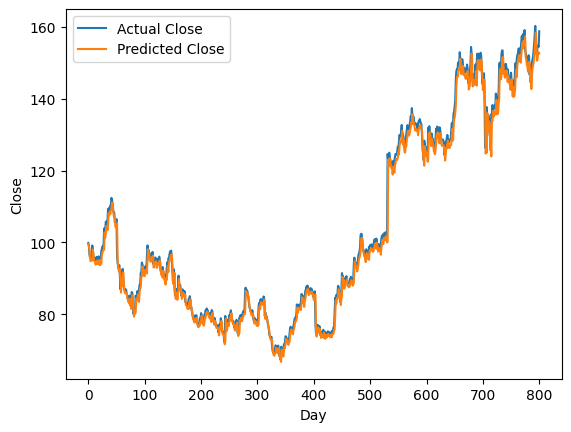

In [170]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch

# Assumes you already have: model (trained), scaler (fitted), lookback, device,
# and your scaled feature array: shifted_df_as_np (shape: [T, lookback+1], col0=target)
# If you used returns, set TARGET_TYPE = "returns", else "price"
TARGET_TYPE = "price"  # or "returns"

model.eval()
with torch.no_grad():
    # Last lookback window from your shifted/scaled data
    last_sequence = shifted_df_as_np[-1, 1:].astype(float).copy()  # shape: (lookback,)

    steps_ahead = 30
    preds_scaled = []
    current_seq = last_sequence.copy()

    for _ in range(steps_ahead):
        x = torch.tensor(current_seq.reshape(1, lookback, 1)).float().to(device)
        y_scaled = model(x).cpu().numpy().flatten()[0]
        preds_scaled.append(y_scaled)
        current_seq = np.roll(current_seq, -1)
        current_seq[-1] = y_scaled

    # Inverse-transform
    dummies = np.zeros((steps_ahead, lookback+1), dtype=float)
    dummies[:, 0] = preds_scaled
    inv = scaler.inverse_transform(dummies)[:, 0]

    if TARGET_TYPE == "returns":
        # Reconstruct prices from returns using last known (unscaled) price
        last_known_price = float(df['Close'].astype(float).values[-1])
        inv = np.clip(inv, -0.3, 0.3)
        future_prices = last_known_price * np.exp(np.cumsum(inv))
        forecast_values = future_prices
    else:
        forecast_values = inv

    # Build forecast dates (business days)
    last_date = pd.to_datetime(df['Date'].iloc[-1])
    future_dates = pd.bdate_range(last_date + pd.Timedelta(days=1), periods=steps_ahead)

    forecast_df = pd.DataFrame({
        "Date": future_dates.strftime("%Y-%m-%d"),
        "Predicted Close": forecast_values
    })

forecast_df.head()

,Date,Predicted Close
0,2025-08-25,152.518706
1,2025-08-26,149.490605
2,2025-08-27,145.398269
3,2025-08-28,140.169572
4,2025-08-29,133.651307


: 